In [10]:
import sys
import os
import json
import numpy as np
import argparse
import random
#import openslide
import cv2
import PIL.Image as Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.models as models
from torch.optim.lr_scheduler import StepLR
import torch
import torchvision
import matplotlib.pyplot as plt

class MILdataset(data.Dataset):
    def __init__(self, libraryfile='', transform=None):
        with open(libraryfile) as json_file:
            lib = json.load(json_file)
        slides = lib['Slides']
#         for i,name in enumerate(lib['slides']):
#             sys.stdout.write('Opening SVS headers: [{}/{}]\r'.format(i+1, len(lib['slides'])))
#             sys.stdout.flush()
#             slides.append(openslide.OpenSlide(name))
        #Flatten grid
        tiles_full = []
        slideIDX = []
        print(len(lib['Tiles']))
        for i,g in enumerate(lib['Tiles']):
            #print('g' , g)
            tiles_full.extend(g)
            slideIDX.extend([i]*len(g))

        print('Number of tiles: {}'.format(len(tiles_full)))
        print('Length ', len(tiles_full), len(slideIDX))
        self.slidenames = lib['Slides']
        self.targets = lib['Targets']
        self.tiles = lib['Tiles']
        self.tiles_full = tiles_full
        self.slideIDX = slideIDX
        self.transform = transform
        self.mode = None
#         self.mult = lib['mult']
#         self.size = int(np.round(224*lib['mult']))
#         self.level = lib['level']
    def setmode(self,mode):
        print('mode ', mode)
        self.mode = mode
    def maketraindata(self, idxs):
        print('idxs  ',idxs)
        self.t_data = [(self.slideIDX[x],self.tiles_full[x],self.targets[self.slideIDX[x]]) for x in idxs]
    def shuffletraindata(self):
        self.t_data = random.sample(self.t_data, len(self.t_data))
    def __getitem__(self,index):
        if self.mode == 1:
            slideIDX = self.slideIDX[index]
            tiles_path = self.tiles_full[index]
            img = cv2.imread(tiles_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            if self.transform is not None:
                img = self.transform(img)
            return img
        elif self.mode == 2:
            slideIDX, coord, target = self.t_data[index]
            tiles_path = self.tiles_full[index]
            try:
                img = cv2.imread(tiles_path)
            except:
                print('ERROR    ', tiles_path)
            if self.transform is not None:
                img = self.transform(img)
            print(img)
            return img, target
    def __len__(self):
        if self.mode == 1:
            return len(self.tiles_full)
        elif self.mode == 2:
            return len(self.t_data)

In [24]:
#normalization
#normalize = transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.1,0.1,0.1])
#, normalize
color = transforms.ColorJitter(brightness=0.1, contrast=0.2, saturation=0.3, hue=0.02)
# brightness=0.2, contrast=0.3
trans = transforms.Compose([transforms.ToTensor(), color])

#load data
train_dset = MILdataset('ValNormalTumoral.json', trans  )
train_dset.setmode(1)
print(train_dset)
train_loader = torch.utils.data.DataLoader(
        train_dset,
        batch_size=8)
# for input in train_loader:
#     print(input)

def show_img(img):
  plt.figure(figsize=(40,38))
  npimg=img.numpy()
  print('npimg ', npimg.shape)
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()
# show_img(torchvision.utils.make_grid(data.next()))


11
Number of tiles: 16614
Length  16614 16614
mode  1


npimg  (3, 516, 4114)


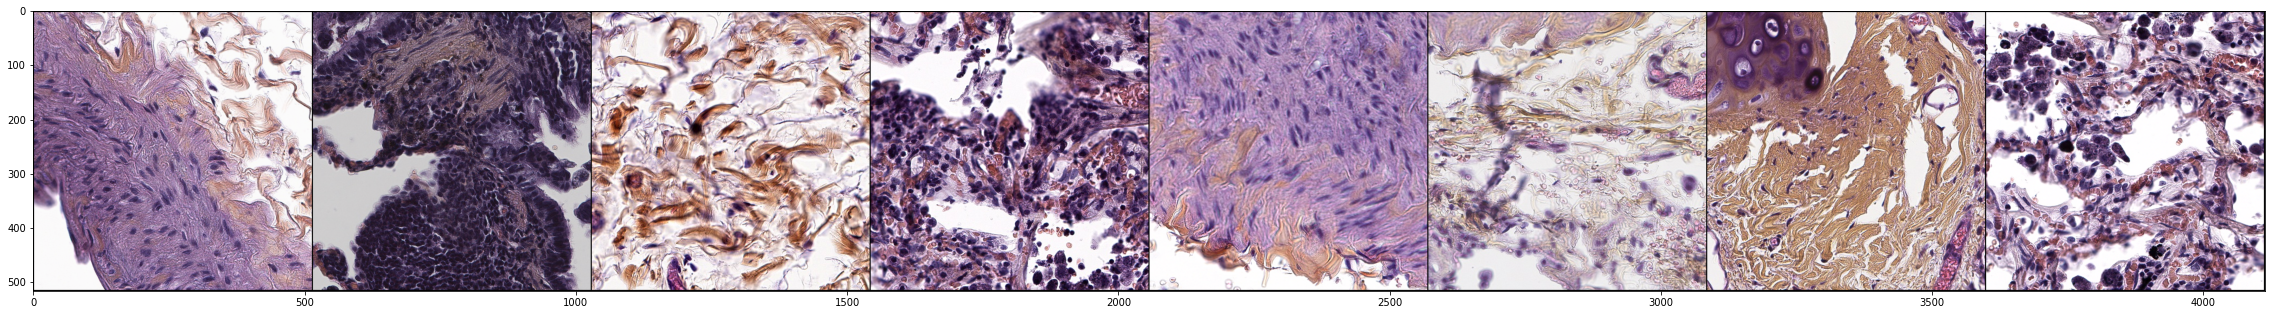

In [29]:
data=iter(train_loader)
show_img(torchvision.utils.make_grid(data.next()))

npimg  (3, 516, 4114)


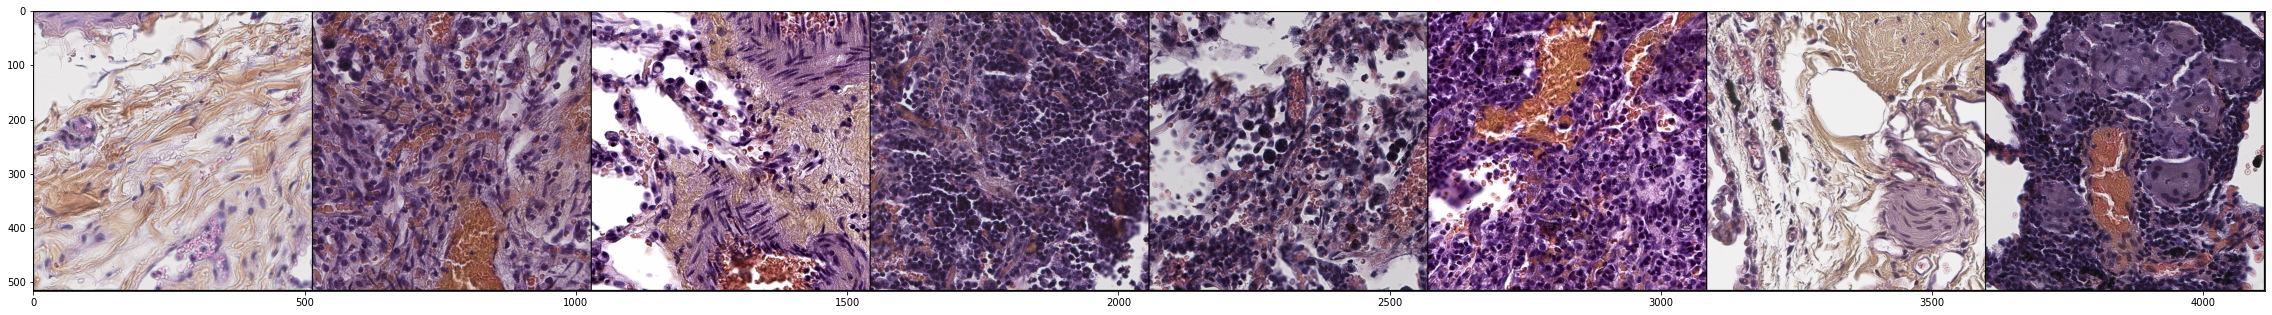

In [30]:
show_img(torchvision.utils.make_grid(data.next()))

In [31]:
516 * 8

4128

npimg  (3, 516, 4114)


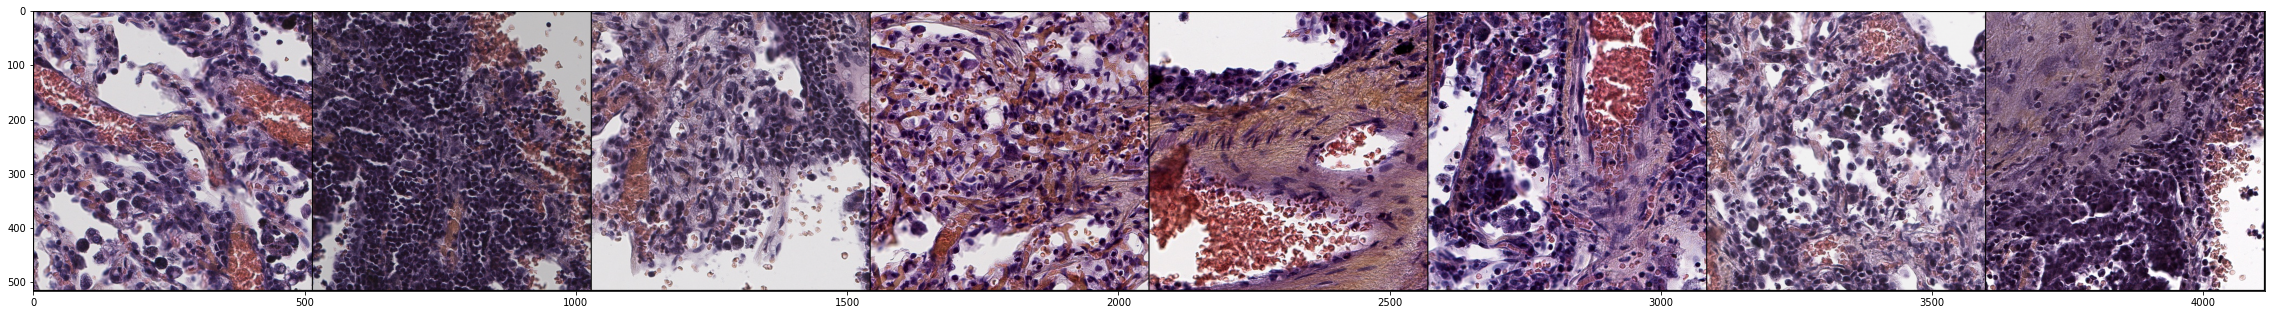

In [32]:
show_img(torchvision.utils.make_grid(data.next()))